# Tennis Ace

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

## Import libraries

In [118]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

## Exploratory analysis

In [115]:
# reading data
df = pd.read_csv('tennis_stats.csv')
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


### Plotting a correlation plot using seaborn

<AxesSubplot:>

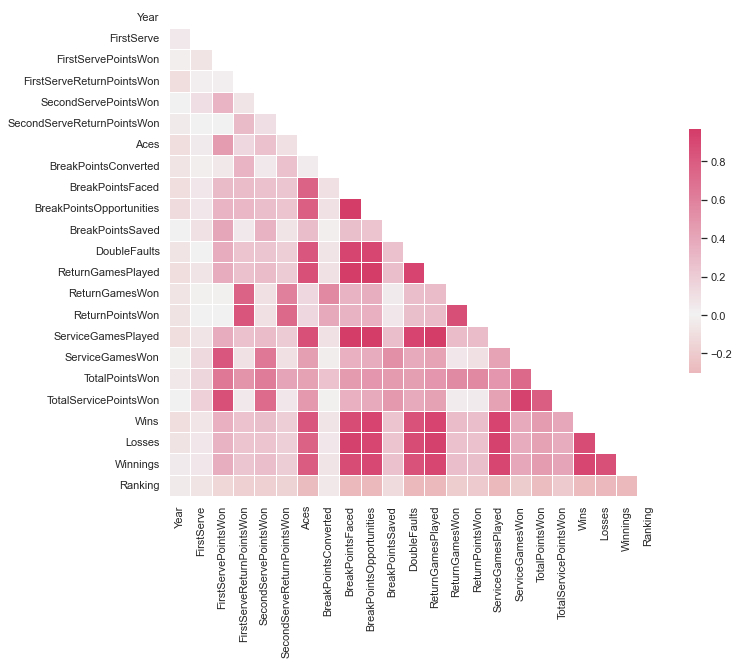

In [74]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a diverging colormap
cmap =sb.diverging_palette(10, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, robust=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation plot, we can list a series of features that are correlated with the outcome (Wins,Losses,Winnings)

In [77]:
features = [
    'Aces',
    'BreakPointsFaced',            
    'BreakPointsOpportunities',
    'DoubleFaults',
    'ReturnGamesPlayed',
    'ServiceGamesPlayed']

In [78]:
outcomes = ['Wins','Losses','Winnings']

### Create a linear regression model using with a single feature

In [108]:
class Score:
    def __init__(self,score,mse,mae):
        self.score = score
        self.mse = mse
        self.mae = mae

In [152]:
def calculate_score(feature,outcome):
    X = np.array(df[feature])
    y = np.array(df[outcome])
    X = np.reshape(X, (-1,1))
    y = np.reshape(y, (-1,1))
    
    # Set random_state=42 to compare with other models
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    model = make_pipeline(
        MinMaxScaler((0, 1)),
        LinearRegression(fit_intercept=True)
    )

    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    r2score = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    
    score = Score(r2score,mse,mae)
    
    plot_truth_predition(feature,outcome,X_train, y_train,X_test,y_test,prediction)
    
    return score

def plot_truth_predition(feature,outcome,X_train, y_train, X_test,y_test,prediction):
    plt.title(f'Feature: {feature}')
    plt.scatter(X_test, y_test, label='Test',alpha=0.5)
    plt.scatter(X_train, y_train, label='Train',alpha=0.5)
    plt.plot(X_test, prediction, label='Prediction',c='r')
    plt.xlabel(feature)
    plt.ylabel(outcome)
    plt.legend()
    plt.show();
    

#### Result for Outcome='Wins'

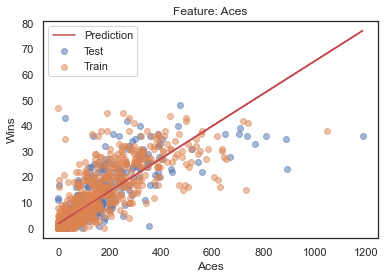

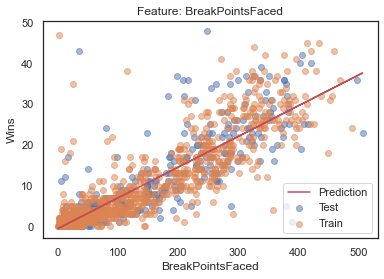

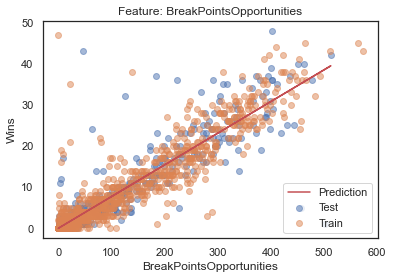

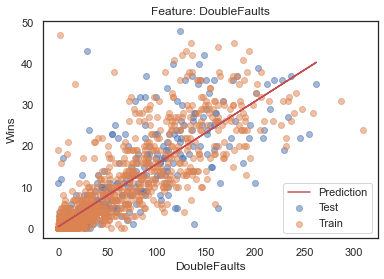

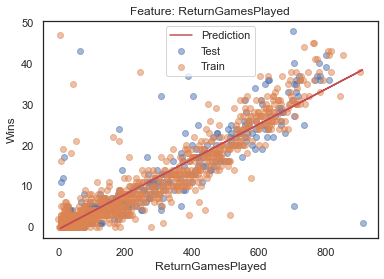

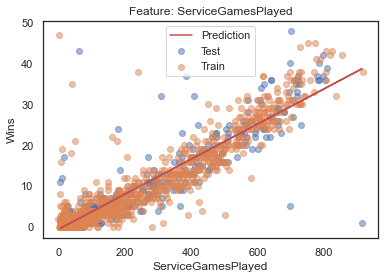

In [154]:
result = [calculate_score(f,'Wins') for f in features]

In [157]:
metrics_report = pd.DataFrame(columns=['r2 score','MSE','MAE'])

for i in range(len(result)):
    metrics_report.loc[features[i], :] = [result[i].score, result[i].mse, result[i].mae]

print(metrics_report.sort_values(by='r2 score',ascending=False))

                          r2 score        MSE       MAE
ServiceGamesPlayed        0.834483  17.664302  2.074213
ReturnGamesPlayed         0.832037  17.925312  2.099879
BreakPointsOpportunities  0.809521  20.328293  2.211835
BreakPointsFaced          0.744987  27.215415   2.85413
DoubleFaults              0.708879  31.068937   3.26741
Aces                      0.653881  36.938429  3.740261


<b> Conclusion:</b> the best feature is 'ServiceGamesPlayed' with a r2_score = 0.834 

#### Result for Outcome='Winnings'

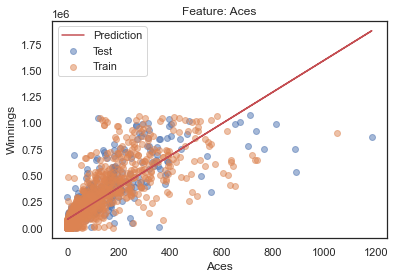

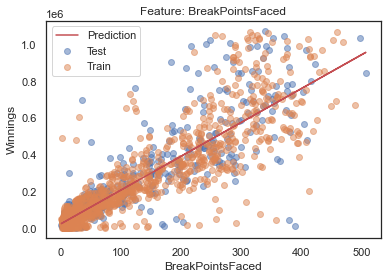

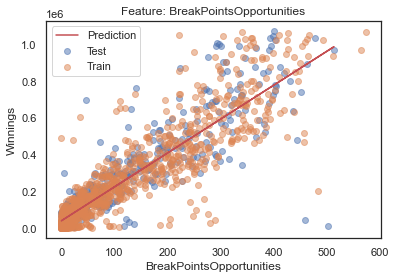

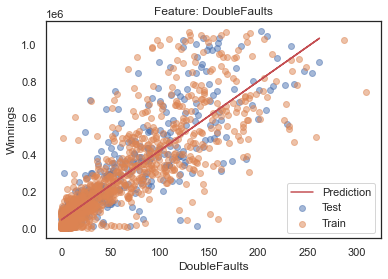

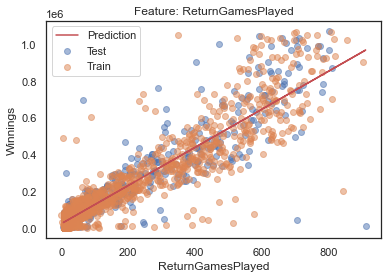

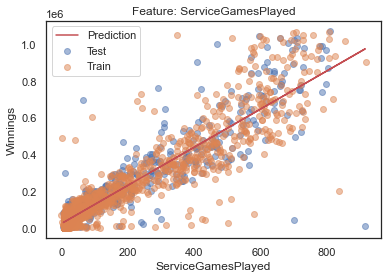

In [158]:
result = [calculate_score(f,'Winnings') for f in features]

In [159]:
metrics_report = pd.DataFrame(columns=['r2 score','MSE','MAE'])

for i in range(len(result)):
    metrics_report.loc[features[i], :] = [result[i].score, result[i].mse, result[i].mae]

print(metrics_report.sort_values(by='r2 score',ascending=False))

                          r2 score                 MSE           MAE
ServiceGamesPlayed        0.821427   12077412960.15325  63219.465797
ReturnGamesPlayed         0.820007  12173506408.652874  63320.621917
BreakPointsOpportunities  0.791539  14098892966.868534  69672.641216
BreakPointsFaced          0.746403  17151577677.893473   74701.53531
DoubleFaults              0.743308  17360872252.023994  84292.651642
Aces                      0.625709  25314465952.277225  99489.937098


<b> Conclusion:</b> the best feature is 'ServiceGamesPlayed' with a r2_score = 0.821 

#### Result for Outcome='Losses'

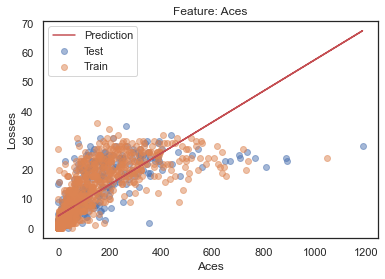

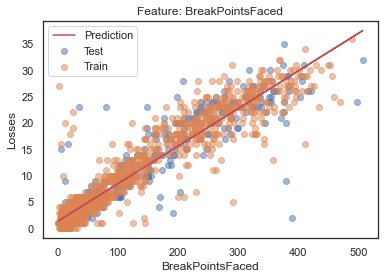

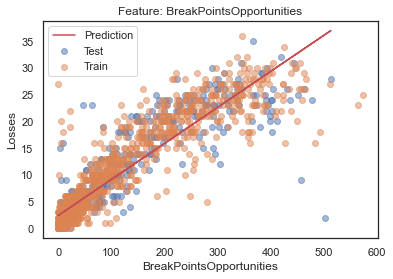

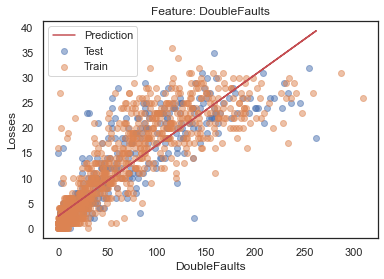

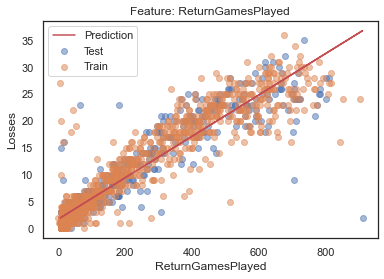

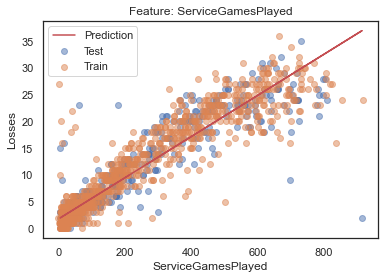

In [161]:
result = [calculate_score(f,'Losses') for f in features]

In [162]:
metrics_report = pd.DataFrame(columns=['r2 score','MSE','MAE'])

for i in range(len(result)):
    metrics_report.loc[features[i], :] = [result[i].score, result[i].mse, result[i].mae]

print(metrics_report.sort_values(by='r2 score',ascending=False))

                          r2 score        MSE       MAE
BreakPointsFaced          0.872622  10.161722  1.940459
ReturnGamesPlayed         0.850454  11.930209  2.151046
ServiceGamesPlayed        0.846302   12.26144  2.189581
BreakPointsOpportunities  0.796581  16.228037  2.666176
DoubleFaults              0.776078   17.86362  2.978673
Aces                      0.528799  37.590646  4.311662


<b>Conclusion:</b> the best feature is 'BreakPointsFaced' with a r2_score = 0.873

### Creating a linear regression model with two features

In [185]:
def calculate_score_two_features(feature1, feature2, outcome):
    X = np.array(df[[feature1,feature2]])
    y = np.array(df[outcome])
    y = np.reshape(y, (-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    model = LinearRegression()
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    r2score = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    
    score = Score(r2score,mse,mae)
    
    return score

def print_score(outcome):
    scores = []
    two_features = []
    for i in range(len(features)):
        for j in range(i+1,len(features)):
            score = calculate_score_two_features(features[i],features[j],outcome)
            scores.append(score)
            two_features.append((features[i],features[j]))


    metrics_report = pd.DataFrame(columns=['Feature1', 'Feature2', 'r2 score', 'MSE','MAE'])

    for i in range(len(two_features)):
        metrics_report.loc[i] = [
            two_features[i][0],
            two_features[i][1],
            f'{scores[i].score:.2f}',
            f'{scores[i].mse:.2f}',
            f'{scores[i].mae:.2f}'
            ]

    print(metrics_report.sort_values(by='r2 score',ascending=False).head(5))

#### Score for Outcome='Wins'

In [186]:
print_score('Wins')

           Feature1                  Feature2 r2 score    MSE   MAE
1              Aces  BreakPointsOpportunities     0.85  16.12  1.89
3              Aces         ReturnGamesPlayed     0.84  17.51  2.06
4              Aces        ServiceGamesPlayed     0.84  17.33  2.04
7  BreakPointsFaced         ReturnGamesPlayed     0.84  17.44  2.03
8  BreakPointsFaced        ServiceGamesPlayed     0.84  17.20  1.99


#### Score for Outcome='Winnings'

In [187]:
print_score('Winnings')

           Feature1                  Feature2 r2 score             MSE  \
1              Aces  BreakPointsOpportunities     0.82  11880064649.26   
3              Aces         ReturnGamesPlayed     0.82  12120456583.47   
4              Aces        ServiceGamesPlayed     0.82  12055339482.55   
7  BreakPointsFaced         ReturnGamesPlayed     0.82  12036770961.01   
8  BreakPointsFaced        ServiceGamesPlayed     0.82  11961217866.94   

        MAE  
1  64109.79  
3  63384.59  
4  63214.71  
7  63138.06  
8  62975.09  


#### Score for Outcome='Losses'

In [184]:
print_score('Losses')

           Feature1                  Feature2 r2 score   MSE   MAE
0              Aces          BreakPointsFaced     0.88  9.51  1.89
5  BreakPointsFaced  BreakPointsOpportunities     0.88  9.94  1.91
6  BreakPointsFaced              DoubleFaults     0.88  9.95  1.93
7  BreakPointsFaced         ReturnGamesPlayed     0.88  9.74  1.88
8  BreakPointsFaced        ServiceGamesPlayed     0.88  9.80  1.89


<b> Conclusion: </b> For the outcome=['Wins,'Winnings'] the best pair of features is ('Aces','BreakPointsOpportunities'). For 'Losses', the best features pair is ('Aces','BreakPointsFaced')

### Model with multiple features

In [191]:
def calculate_score_all_features(outcome):
    X = np.array(df[features])
    y = np.array(df[outcome])
    y = np.reshape(y, (-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    model = LinearRegression()
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    r2score = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    mae = mean_absolute_error(y_test,prediction)
    
    score = Score(r2score,mse,mae)
    
    return score

#### Calculating score for 'Wins'

In [193]:
score = calculate_score_all_features('Wins')
print(f'r2_score = {score.score:.2f}\t mse = {score.mse:.2f} \t mae = {score.mae:.2f}')

r2_score = 0.85	 mse = 16.11 	 mae = 1.79


#### Calculating score for 'Winnings'

In [195]:
score = calculate_score_all_features('Winnings')
print(f'r2_score = {score.score:.2f}\t mse = {score.mse:.2f} \t mae = {score.mae:.2f}')

r2_score = 0.83	 mse = 11595809828.97 	 mae = 62211.19


#### Calculating score for 'Losses'

In [194]:
score = calculate_score_all_features('Losses')
print(f'r2_score = {score.score:.2f}\t mse = {score.mse:.2f} \t mae = {score.mae:.2f}')

r2_score = 0.90	 mse = 8.28 	 mae = 1.67
